<center>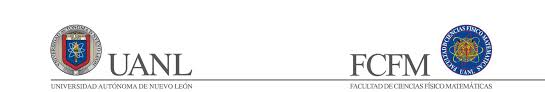  </center>



<h1>  <center>  Aprendizaje Automatizado   </center>    <h1>  

<t1>    <center>    <b> PIA: Modelo de Clasificacion   </center>  </t1>

<t1>   <center>   
   <b>   Nombre  </b>    Cynthia  Selene Martínez Espinoza <b>  Matricula   </b> 1011238                            
</center>   </t1>

<h2> Carga de Librerias / funciones </h2>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, roc_auc_score , roc_curve, DetCurveDisplay, RocCurveDisplay

<h2> Carga y exploracion de datos </h2>

In [3]:
# Leer los datos de archivo csv
url =  "C:/Users/PC/Documents/GitHub/GitFlow-en-Github/ML003/PIA/Practica PIA/prueba.csv"
df_prueba = pd.read_csv(url)

In [4]:
# Leer los datos de archivo csvL
url =  "C:/Users/PC/Documents/GitHub/GitFlow-en-Github/ML003/PIA/Practica PIA/entrenamiento.csv"
df_entrenamiento = pd.read_csv(url)

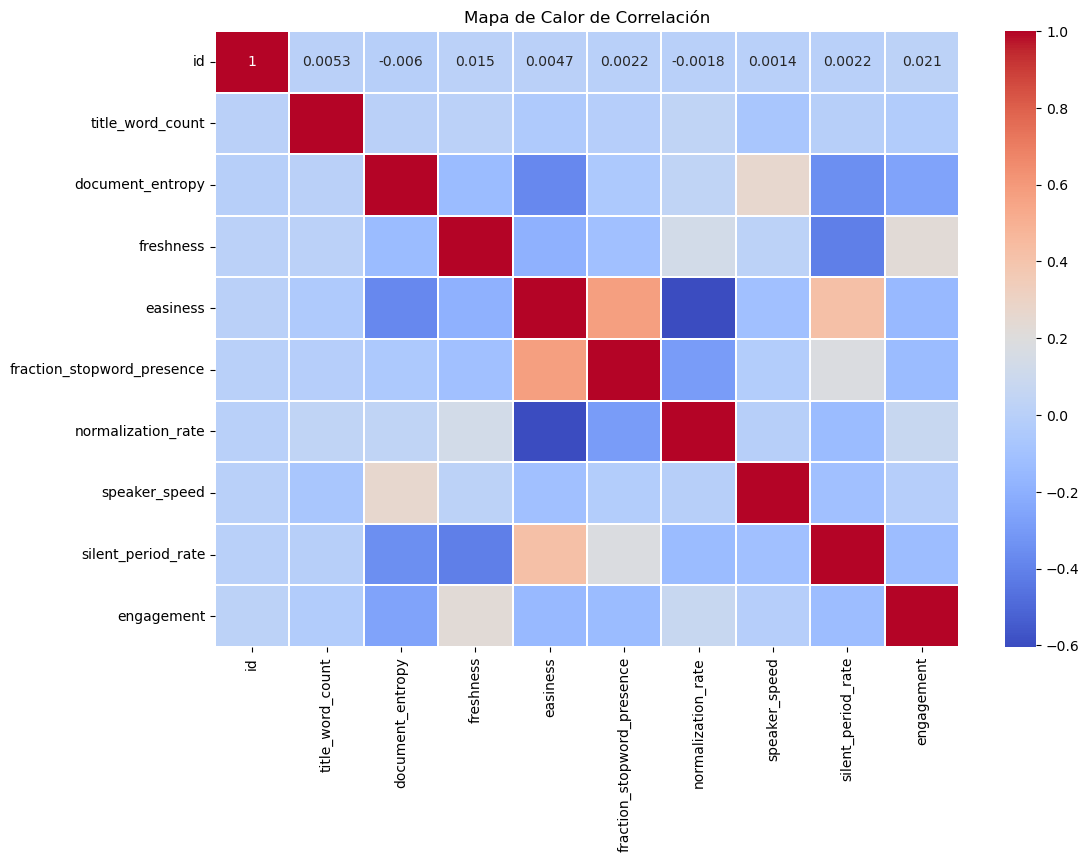

In [5]:
# Calcular la matriz de correlación
correlation_matrix = df_entrenamiento.corr()

# Crear la gráfica de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.3)
plt.title('Mapa de Calor de Correlación')
plt.savefig("C:/Users/PC/Documents/GitHub/GitFlow-en-Github/ML003/PIA/Practica PIA/GraficaMapaCalorCorrelacion.png")
plt.show()
plt.close()

In [6]:
# Separar y elegimos las variables y objetivo en el conjunto de entrenamiento
X = df_entrenamiento.drop(columns=['id', 'title_word_count','engagement','speaker_speed','silent_period_rate','easiness'])
y = df_entrenamiento['engagement'].astype(int)  # Convertir objetivo a entero

In [7]:
X.head()

,document_entropy,freshness,fraction_stopword_presence,normalization_rate
0,7.753995,16310,0.553664,0.034049
1,8.305269,15410,0.584498,0.018763
2,7.965583,15680,0.605685,0.030720
3,8.142877,15610,0.593664,0.016873
4,8.161250,14920,0.581637,0.023412


In [8]:
# Definir las columnas numéricas
numeric_features = X.columns

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
X_entrenamiento, X_temp, y_entrenamiento, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val,   X_prueba, y_val,   y_prueba = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [13]:
# Definir los modelos
Modelos = {
    "Vecinos Cercanos (KNN)": KNeighborsClassifier(metric='euclidean', n_neighbors=30, weights='distance'),
    "Maquina Vector soporte (SVM)": SVC(probability=True),
    "Arbol de decision": DecisionTreeClassifier()
}
#{'classifier__metric': 'manhattan', 'classifier__n_neighbors': 30, 'classifier__weights': 'distance'}

In [14]:
# Configurar StratifiedKFold
cv = StratifiedKFold(n_splits=5)

# Iterar sobre cada modelo y calcular el ROC AUC promedio
for nombre_modelo, modelo in Modelos.items():
    # Crear pipeline con el preprocesador y el modelo
    pipeline = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('classifier', modelo)
    ])
    # Calcular cross_val_score
    cv_scores = cross_val_score(pipeline, X_entrenamiento, y_entrenamiento, cv=cv, scoring='roc_auc')
    
    # Imprimir resultados
    print(f"Validacion Cruzada ROC AUC con {nombre_modelo}: {cv_scores.mean()}")

Validacion Cruzada ROC AUC con Vecinos Cercanos (KNN): 0.8528297716563499
Validacion Cruzada ROC AUC con Maquina Vector soporte (SVM): 0.797083846083219
Validacion Cruzada ROC AUC con Arbol de decision: 0.7016747213047172


In [15]:
# Evaluar cada clasificador
resultados = {}
for nombre_modelo, modelo in Modelos.items():

# Entrenar el modelo
    modelo.fit(X_entrenamiento, y_entrenamiento)

# Validar el modelo
    y_val_pred = modelo.predict(X_val)
    validacion_accuracy = accuracy_score(y_val, y_val_pred)

# Evaluar el modelo en el conjunto de prueba
    y_prueba_pred = modelo.predict(X_prueba)
    prueba_accuracy = accuracy_score(y_prueba, y_prueba_pred)

# Calcular el ROC AUC
    y_pred_proba = modelo.predict_proba(X_prueba)[:, 1]
    roc_auc = roc_auc_score(y_prueba, y_pred_proba)
    
   # resultados
    resultados[nombre_modelo] = {
        "Validacion_Accuracy": validacion_accuracy,
        "Prueba_Accuracy": prueba_accuracy,
        "ROC_AUC": roc_auc
    }

In [16]:
# Mostrar los resultados
resultados_df = pd.DataFrame(resultados).T
print(resultados_df)

                              Validacion_Accuracy  Prueba_Accuracy   ROC_AUC
Vecinos Cercanos (KNN)                   0.928030         0.913961  0.838243
Maquina Vector soporte (SVM)             0.902597         0.898268  0.285571
Arbol de decision                        0.895563         0.887446  0.666137


<h1>  Graficas  </h1>

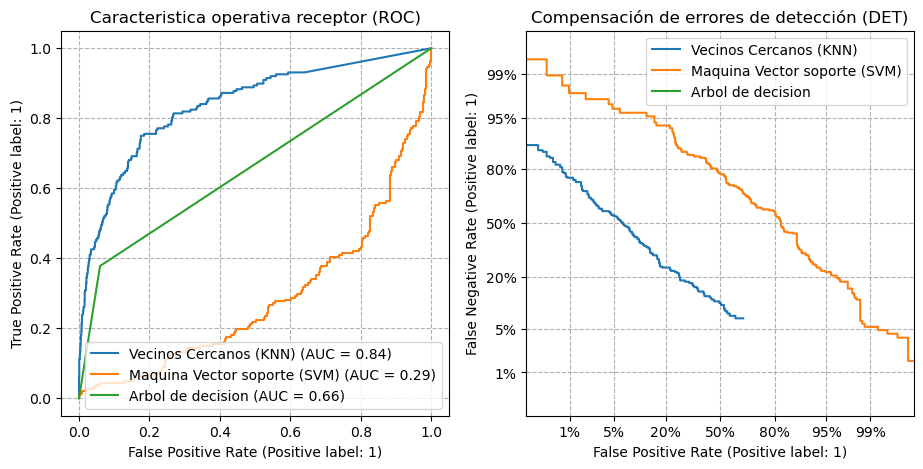

In [18]:
fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

for name, clf in Modelos.items():
    clf.fit(X_entrenamiento, y_entrenamiento)

    RocCurveDisplay.from_estimator(clf, X_prueba, y_prueba, ax=ax_roc, name=name)
    DetCurveDisplay.from_estimator(clf, X_prueba, y_prueba, ax=ax_det, name=name)

ax_roc.set_title("Caracteristica operativa receptor (ROC)")
ax_det.set_title("Compensación de errores de detección (DET)")

ax_roc.grid(linestyle="--")
ax_det.grid(linestyle="--")

plt.legend()
plt.savefig("C:/Users/PC/Documents/GitHub/GitFlow-en-Github/ML003/PIA/Practica PIA/GraficaROC.png")
plt.show()
plt.close()

<h1>  Conclusiones  </h1>

<t1>  El modelo K-Nearest Neighbors (KNN) fue evaluado para predecir la probabilidad de que se otorgue un contrato, basándose en el conjunto de datos proporcionado.  
El rendimiento del modelo se midió utilizando la métrica de ROC AUC, la cual alcanzó un valor de 0.84.  El valor de ROC AUC de 0.84 indica que el modelo tiene una buena capacidad para distinguir entre las clases de 'contrato otorgado' y 'contrato no otorgado'. 
  </t1>